In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
!pip install keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
ffires=pd.read_csv("https://raw.githubusercontent.com/sfarhan79/datasets/main/python%20datasets/csv/forest%20fires.csv")
ffires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
ffires.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
ffires.shape

(517, 31)

In [6]:
ffires.T

,0,1,2,3,4,5,6,7,8,9,...,507,508,509,510,511,512,513,514,515,516
month,mar,oct,oct,mar,mar,aug,aug,aug,sep,sep,...,aug,aug,aug,aug,aug,aug,aug,aug,aug,nov
day,fri,tue,sat,fri,sun,sun,mon,mon,tue,sat,...,fri,fri,fri,fri,sun,sun,sun,sun,sat,tue
FFMC,86.2,90.6,90.6,91.7,89.3,92.3,92.3,91.5,91.0,92.5,...,91.0,91.0,91.0,91.0,81.6,81.6,81.6,81.6,94.4,79.5
DMC,26.2,35.4,43.7,33.3,51.3,85.3,88.9,145.4,129.5,88.0,...,166.9,166.9,166.9,166.9,56.7,56.7,56.7,56.7,146.0,3.0
DC,94.3,669.1,686.9,77.5,102.2,488.0,495.6,608.2,692.6,698.6,...,752.6,752.6,752.6,752.6,665.6,665.6,665.6,665.6,614.7,106.7
ISI,5.1,6.7,6.7,9.0,9.6,14.7,8.5,10.7,7.0,7.1,...,7.1,7.1,7.1,7.1,1.9,1.9,1.9,1.9,11.3,1.1
temp,8.2,18.0,14.6,8.3,11.4,22.2,24.1,8.0,13.1,22.8,...,25.9,25.9,21.1,18.2,27.8,27.8,21.9,21.2,25.6,11.8
RH,51,33,33,97,99,29,27,86,63,40,...,41,41,71,62,35,32,71,70,42,31
wind,6.7,0.9,1.3,4.0,1.8,5.4,3.1,2.2,5.4,4.0,...,3.6,3.6,7.6,5.4,2.7,2.7,5.8,6.7,4.0,4.5
rain,0.0,0.0,0.0,0.2,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.4,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
ffires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
numerical_features=ffires.describe(include=["int64","float"]).columns
print(list(numerical_features))

['FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area', 'dayfri', 'daymon', 'daysat', 'daysun', 'daythu', 'daytue', 'daywed', 'monthapr', 'monthaug', 'monthdec', 'monthfeb', 'monthjan', 'monthjul', 'monthjun', 'monthmar', 'monthmay', 'monthnov', 'monthoct', 'monthsep']


In [9]:
sns.set_style("darkgrid")
sns.pairplot(ffires[numerical_features])
plt.show()

Output hidden; open in https://colab.research.google.com to view.

In [10]:
categorical_features=ffires.describe(include=["object"]).columns
print(list(categorical_features))

['month', 'day', 'size_category']


<ipython-input-11-15ddc385afff>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ffires,x=column,palette="dark")


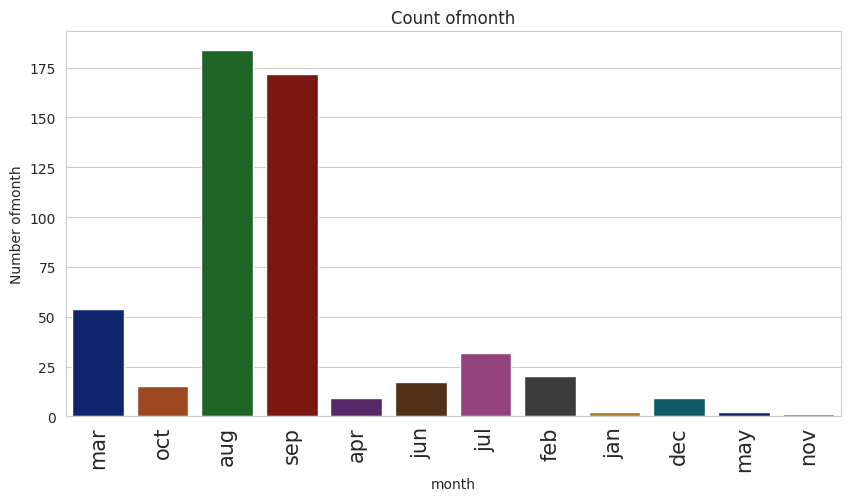

<ipython-input-11-15ddc385afff>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ffires,x=column,palette="dark")


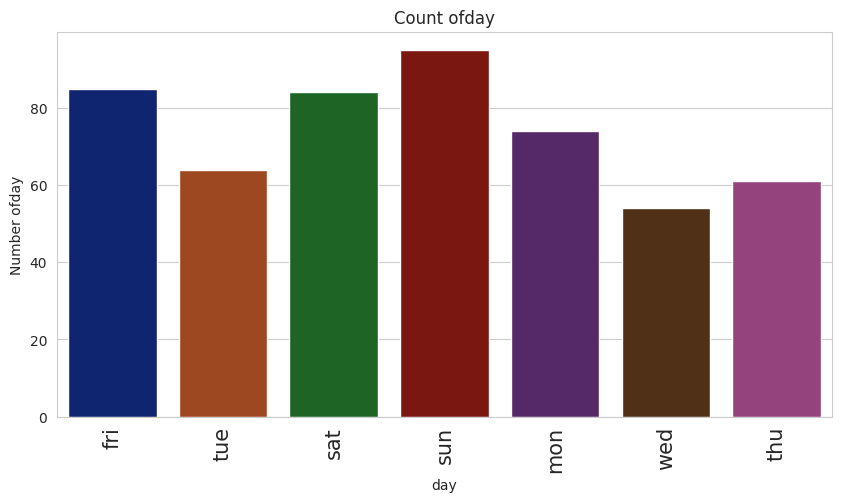

<ipython-input-11-15ddc385afff>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=ffires,x=column,palette="dark")


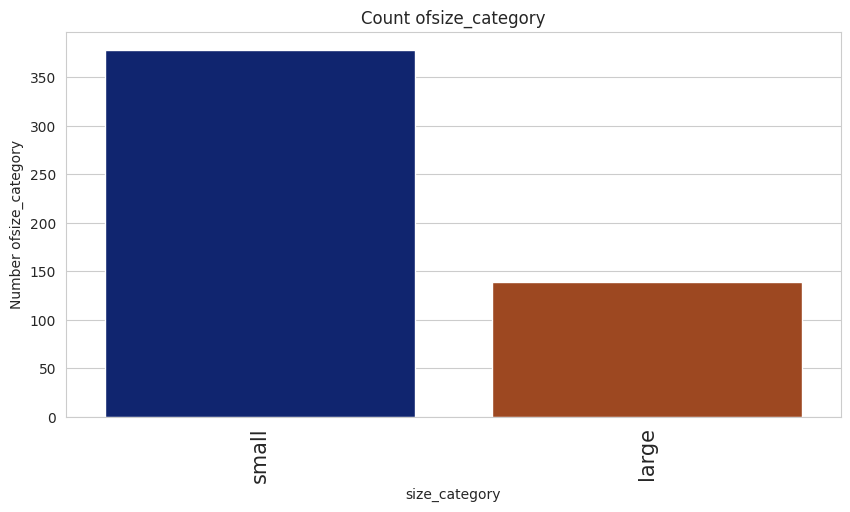

In [11]:
for idx,column in enumerate(categorical_features):
  plt.figure(figsize=(10,5))
  df=ffires.copy()
  unique=df[column].value_counts(ascending=True)

  plt.title("Count of" +column)
  sns.countplot(data=ffires,x=column,palette="dark")
  plt.xticks(rotation=90,size=15)

  plt.xlabel(column,fontsize=10)
  plt.ylabel("Number of" +column,fontsize=10)
  plt.show()

In [12]:
ffire=ffires.iloc[:,2:30]

In [13]:
ss=StandardScaler()
ss.fit(ffire)

StandardScaler()

In [14]:
ss_transform=ss.transform(ffire)
ss_transform

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [15]:
pca=PCA(n_components=28)
pca_transform=pca.fit_transform(ffire)
pca_transform

array([[ 4.61747882e+02, -6.74568062e+00, -1.18064792e+00, ...,
        -1.70201074e-03,  7.45243999e-14, -6.01616843e-14],
       [-1.05453927e+02, -2.15882268e+01, -9.51409850e+01, ...,
        -2.99729424e-02, -4.95371850e-14,  5.03003691e-14],
       [-1.24410859e+02, -2.14885270e+01, -9.02456493e+01, ...,
        -1.88911350e-02,  7.78162938e-14,  1.72015784e-13],
       ...,
       [-1.05846239e+02, -9.45354219e+00, -7.26129621e+01, ...,
         2.39076643e-02, -2.61196621e-14,  2.21936825e-14],
       [-7.19099331e+01, -1.19352099e+01,  2.36250675e+01, ...,
         3.72741991e-03,  7.59939368e-15,  1.65365537e-14],
       [ 4.53691134e+02, -8.45159324e+00, -2.74293269e+01, ...,
         9.03949928e-01,  2.57810784e-15,  3.79571182e-15]])

In [16]:
var=pca.explained_variance_ratio_
var1=np.cumsum(np.round(var,decimals=4)*100)
var1

array([90.71, 96.5 , 99.53, 99.92, 99.96, 99.98, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99,
       99.99])

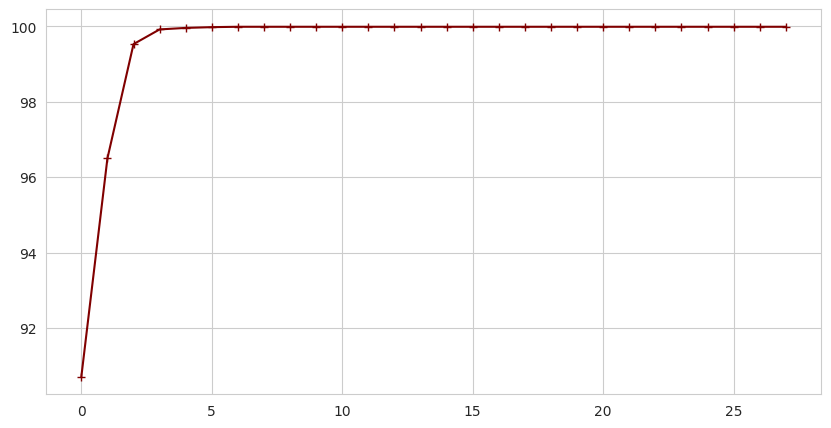

In [18]:
fig=plt.figure(figsize=(10,5))
plt.plot(var1,color="maroon",marker="+")
plt.show()

In [19]:
finaldf=pd.concat([pd.DataFrame(pca_transform[:,0:24],columns=["pca1","pca2","pca3","pca4","pca5","pca6","pca7","pca8","pca9","pca10",
                                                               "pca11","pca12","pca13","pca14","pca15","pca16","pca17","pca18","pca19","pca20",
                                                               "pca21","pca22","pca23","pca24"]),ffires[["size_category"]]],axis=1)
finaldf.size_category.replace(("large","small"),(1,0),inplace=True)
finaldf.head()

,pca1,pca2,pca3,pca4,pca5,pca6,pca7,pca8,pca9,pca10,...,pca16,pca17,pca18,pca19,pca20,pca21,pca22,pca23,pca24,size_category
0,461.747882,-6.745681,-1.180648,6.739605,1.937306,-3.825971,1.338494,-1.624079,0.294878,-0.235131,...,0.120853,-0.213181,-0.463552,-0.006778,-0.000093,-0.061854,-0.090190,-0.024018,0.008051,0
1,-105.453927,-21.588227,-95.140985,-5.852586,0.574293,-1.677195,-1.022677,2.646571,-0.764498,-0.149178,...,-0.337442,0.333246,-0.380355,0.649332,0.419475,0.255297,0.077092,0.045125,-0.020619,0
2,-124.410859,-21.488527,-90.245649,-5.301114,1.624687,-4.690769,0.863112,2.745948,-0.784627,-0.425094,...,-0.059695,0.537056,-0.380789,0.580857,0.390141,0.226046,-0.001199,0.057658,-0.015982,0
3,477.039697,-6.565667,11.635404,49.849239,-11.771663,0.531723,-4.363509,0.657234,0.568785,-0.335356,...,0.229630,-0.336820,-0.525253,0.066940,0.041577,-0.007491,0.169370,-0.089400,-0.024016,0
4,449.496000,-5.931726,24.982278,50.931338,-10.383034,4.385633,-4.637417,2.558449,0.369848,0.744082,...,0.137667,-0.485234,-0.572903,0.078503,0.100190,-0.012248,0.262646,-0.133973,0.007208,0


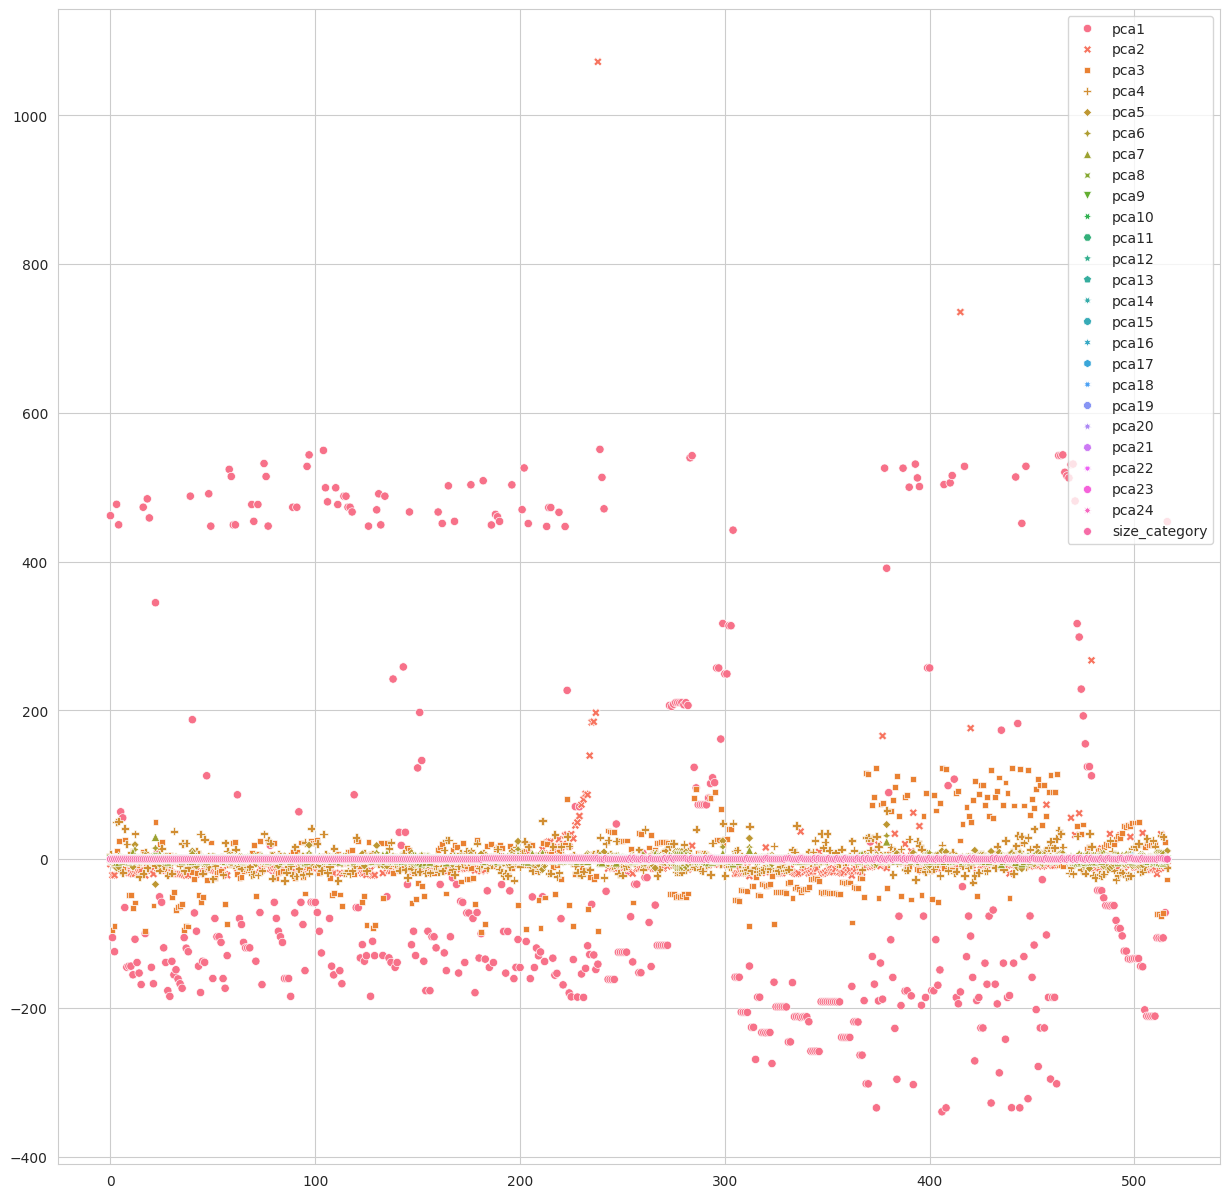

In [24]:
fig=plt.figure(figsize=(15,15))
sns.scatterplot(finaldf)
plt.legend(loc="best")
plt.show()

In [25]:
array=finaldf.values
X=array[:,0:24]
Y=array[:,24]

In [29]:
model=Sequential()
model.add(Dense(12,input_dim=24,activation="relu"))
model.add(Dense(10,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [30]:
model.compile(loss="binary_crossentropy",optimizer="adam",metrics=["accuracy"])
model.fit(X,Y,validation_split=0.20,epochs=100,batch_size=10)

Epoch 1/100
42/42 [==============================] - 3s 25ms/step - loss: 8.1360 - accuracy: 0.7385 - val_loss: 4.8996 - val_accuracy: 0.6923
Epoch 2/100
42/42 [==============================] - 0s 12ms/step - loss: 1.6331 - accuracy: 0.7240 - val_loss: 1.0827 - val_accuracy: 0.7019
Epoch 3/100
42/42 [==============================] - 0s 6ms/step - loss: 0.7133 - accuracy: 0.7554 - val_loss: 0.7511 - val_accuracy: 0.6923
Epoch 4/100
42/42 [==============================] - 0s 7ms/step - loss: 0.5526 - accuracy: 0.7700 - val_loss: 0.6799 - val_accuracy: 0.7115
Epoch 5/100
42/42 [==============================] - 0s 6ms/step - loss: 0.5812 - accuracy: 0.8087 - val_loss: 0.6761 - val_accuracy: 0.6154
Epoch 6/100
42/42 [==============================] - 0s 7ms/step - loss: 0.4277 - accuracy: 0.8305 - val_loss: 0.5822 - val_accuracy: 0.7019
Epoch 7/100
42/42 [==============================] - 0s 6ms/step - loss: 0.3578 - accuracy: 0.8596 - val_loss: 0.4877 - val_accuracy: 0.8365
Epoch 8/100

In [31]:
score=model.evaluate(X,Y)
print("%s: %.2f%%" %(model.metrics_names[1],score[1]*100))

17/17 [==============================] - 0s 3ms/step - loss: 0.0732 - accuracy: 0.9749
accuracy: 97.49%
